# Autour du SARS-CoV-2 (Covid-19)

## le 31 aout 2022 - blandine

Le but de ce document est de créer des graphiques permettant de suivre l'évolution de l'épidémie du COVID. 

### Déclaration des librairies utilisées dans ce document

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

### Import des données
Nous allons utiliser les données de Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) qui ont été mises à disposition sur GitHub. 
C’est plus particulièrement sur les données time_series_covid19_confirmed_global.csv (des suites chronologiques au format csv) disponibles à l’adresse : https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv. 

In [3]:
Raw_data = pd.read_csv ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
Raw_data.head(5)

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20   ...    8/23/22  8/24/22  8/25/22  \
0        0        0        0        0   ...     191247   191585   191967   
1        0        0        0        0   ...     326787   327232   327607   
2        0        0        0        0   ...     269971   270043   270097   
3        0        0        0        0   ...      45975    46027    46027   
4        0        0        0        0   ...     102636   102636   102636   

   8/26/22  8/27/22  8/28/22  8/29/22  8/30/22  8/31/22  9/1/22  
0   191967   191967   192463   192906   193004   193250  193520  
1   327961   328299   328515   328571   329017   329352  329615  
2   270145   270175   270194   270235   270272   270304  270359  
3    46027    46027    46027    46027    46027    46027   46027  
4   102636   102636   102636   102636   102636   102636  102636  

[5 rows x 958 columns]

### Selection des territoires économiques que l'on aimerait étudier:
à savoir les zones géographiques suivantes : 
- la Belgique (Belgium), 
- la Chine - toutes les provinces sauf Hong-Kong (China), 
- Hong Kong (China, Hong-Kong),
- la France métropolitaine (France), 
- l’Allemagne (Germany), 
- l’Iran (Iran),
- l’Italie (Italy),
- le Japon (Japan),
- la Corée du Sud (Korea, South),
- la Hollande sans les colonies (Netherlands), 
- le Portugal (Portugal),
- l’Espagne (Spain), 
- le Royaume-Unis sans les colonies (United Kingdom),
- les États-Unis (US).

#### Création d'un dataframe ne contenant que les zones géographiques listées ci-dessus

In [4]:
# tout d'abord on ne selectionne que les pays qui affiche des données au niveau national
Select_data= Raw_data[Raw_data['Country/Region'].isin(['Belgium', 'France','Netherlands', 'United Kingdom', 'Germany', 'Iran','Italy','Japan', 'Korea, South', 'Portugal','Spain','US'])==True]

# Le fichier  présentent également des données pour des colonies/departements d'outre- mer ( cas de la france, holande,royaume uni) 
# Pour se faire, nous ne  gardons que les lignes où l'identification d'une province/state est absente (on exclut les colonies/departements d outre mer)
Select_data2= Select_data[Select_data['Province/State'].isnull()]


# cas de la chine 
#les données au niveau national n'ont pas été aggrégées, il faut donc sommer toutes les provinces (sauf Hong Kong qu il faut traiter à part)
#pour obtenir le territoire national. Par consequent on va traiter separemment Hong kong et la Chine 

#Hongkong : selection puis renommage 
HongKong  =Raw_data[Raw_data['Province/State']=="Hong Kong"]
HongKong.loc[71,'Country/Region'] ="Hong Kong"

#china : selection puis aggregation          
China = Raw_data[Raw_data['Country/Region']=="China"]
#ChinaSum= China.loc[China['Province/State']!="Hong Kong"].sum(axis=0) 
ChinaSum= China.loc[China['Province/State']!="Hong Kong"].agg('sum') 

#on transforme la serie obtenue en dataframe et on fait pivoter les index en colonnes (.T)
ChinaNat= pd.DataFrame(ChinaSum).T
ChinaNat.loc[0,'Country/Region'] ="China"

# On met ces 3 selections de données dans un meme dataset
DatasetConcat =pd.concat([Select_data2,HongKong, ChinaNat])
DatasetConcat.reset_index(inplace=True)
# et on supprime les colonnes inutiles
Dataset= DatasetConcat.drop(columns=['index','Province/State', 'Lat','Long'])

Dataset


/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Country/Region 1/22/20 1/23/20 1/24/20 1/25/20 1/26/20 1/27/20 1/28/20  \
0          Belgium       0       0       0       0       0       0       0   
1           France       0       0       2       3       3       3       4   
2          Germany       0       0       0       0       0       1       4   
3             Iran       0       0       0       0       0       0       0   
4            Italy       0       0       0       0       0       0       0   
5            Japan       2       2       2       2       4       4       7   
6     Korea, South       1       1       2       2       3       4       4   
7      Netherlands       0       0       0       0       0       0       0   
8         Portugal       0       0       0       0       0       0       0   
9            Spain       0       0       0       0       0       0       0   
10              US       1       1       2       2       5       5       5   
11  United Kingdom       0       0       0       0       0       0       0   
12       Hong Kong       0       2       2       5       8       8       8   
13           China     548     641     918    1401    2067    2869    5501   

   1/29/20 1/30/20    ...      8/23/22   8/24/22   8/25/22   8/26/22  \
0        0       0    ...      4471620   4471620   4477770   4477770   
1        5       5    ...     33440664  33461953  33481790  33493920   
2        4       4    ...     31921578  31921578  32008122  32041348   
3        0       0    ...      7513928   7516596   7518974   7520993   
4        0       0    ...     21696242  21721630  21745065  21767060   
5        7      11    ...     17537636  17781018  18001865  18194170   
6        4       4    ...     22588640  22701921  22802985  22898523   
7        0       0    ...      8377269   8378537   8379737   8380891   
8        0       0    ...      5399857   5399857   5406095   5409185   
9        0       0    ...     13323784  13323784  13323784  13332976   
10       6       6    ...     93776222  93927276  94066043  94186442   
11       0       0    ...     23460787  23460787  23492875  23492875   
12      10      10    ...      1471509   1479393   1487972   1495807   
13    6077    8131    ...       944631    946165    947626    948009   

     8/27/22   8/28/22   8/29/22   8/30/22   8/31/22    9/1/22  
0    4477770   4477770   4482315   4482315   4482315   4488054  
1   33493920  33493920  33529669  33553391  33572631  33591277  
2   32041349  32041350  32095854  32095854  32184553  32218483  
3    7521969   7523662   7525628   7527499   7528961   7530325  
4   21788862  21806509  21814856  21845943  21867757  21888255  
5   18374230  18531986  18627815  18780302  18949793  19099600  
6   22983818  23026960  23142479  23246398  23327897  23417425  
7    8380891   8380891   8383706   8384992   8386189   8386189  
8    5409185   5409185   5413173   5417101   5420140   5420140  
9   13332976  13332976  13332976  13342530  13342530  13342530  
10  94197793  94204626  94306725  94378287  94531854  94649469  
11  23492875  23492875  23492875  23492875  23521792  23521792  
12   1504264   1513972   1522460   1531308   1540803   1551389  
13    948316    952082    953856    955555    957285    959314  

[14 rows x 955 columns]

#### Creation du graphique montrant l'évolution du Covid en cas cumulés au cours du temps pour cette selection de pays

#### D abord mis au format date de la serie temporelle

In [5]:
from datetime import datetime
import datetime
import time
Dat = pd.DataFrame(Dataset.columns[1:])

#D=time.strptime('1/2/20','%m/%d/%y')

#D=[time.strptime(Dt,'%m/%d/%y')for Dt in Dataset.columns[1:]]

#Dat[0] = Dat[0].apply(lambda x: time.strptime(x, '%m/%d/%y'))

Calendar = pd.to_datetime(Dat[0], format="%m/%d/%y")

#D['period'] = [datetime.time(yw,'%m/%d/%Y') for yw in Dat.index]
Calendar


0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
5     2020-01-27
6     2020-01-28
7     2020-01-29
8     2020-01-30
9     2020-01-31
10    2020-02-01
11    2020-02-02
12    2020-02-03
13    2020-02-04
14    2020-02-05
15    2020-02-06
16    2020-02-07
17    2020-02-08
18    2020-02-09
19    2020-02-10
20    2020-02-11
21    2020-02-12
22    2020-02-13
23    2020-02-14
24    2020-02-15
25    2020-02-16
26    2020-02-17
27    2020-02-18
28    2020-02-19
29    2020-02-20
         ...    
924   2022-08-03
925   2022-08-04
926   2022-08-05
927   2022-08-06
928   2022-08-07
929   2022-08-08
930   2022-08-09
931   2022-08-10
932   2022-08-11
933   2022-08-12
934   2022-08-13
935   2022-08-14
936   2022-08-15
937   2022-08-16
938   2022-08-17
939   2022-08-18
940   2022-08-19
941   2022-08-20
942   2022-08-21
943   2022-08-22
944   2022-08-23
945   2022-08-24
946   2022-08-25
947   2022-08-26
948   2022-08-27
949   2022-08-28
950   2022-08-29
951   2022-08-

In [ ]:
# Definition d une serie par pays
X_ax = Calendar
Belgique = Dataset.iloc[0].squeeze()
France= Dataset.iloc[1].squeeze()
Allemagne = Dataset.iloc[2].squeeze()
Iran = Dataset.iloc[3].squeeze()

Italy = Dataset.iloc[4].squeeze()
Japon = Dataset.iloc[5].squeeze()
Coree = Dataset.iloc[6].squeeze()
PaysBas= Dataset.iloc[7].squeeze()

Portugal = Dataset.iloc[8].squeeze()
Espagne = Dataset.iloc[9].squeeze()
EtatsUnis = Dataset.iloc[10].squeeze()
RoyaumeUni  = Dataset.iloc[11].squeeze()
HongKongs  = Dataset.iloc[12].squeeze()
Chine= Dataset.iloc[13].squeeze()

## Graph -- Evolution du nombre cumulé de cas covid par pays

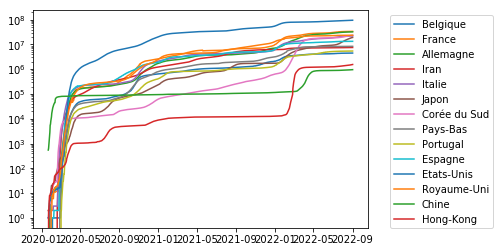

In [19]:
# On indique quelles series on montre dans le graphique
plt.plot(X_ax, Belgique[1:], label='Belgique')
plt.plot( X_ax, France[1:], label= 'France')
plt.plot( X_ax, Allemagne[1:], label= 'Allemagne')
plt.plot( X_ax, Iran[1:], label= 'Iran')
plt.plot( X_ax, Italy[1:], label= 'Italie')
plt.plot( X_ax, Japon[1:], label= 'Japon')
plt.plot( X_ax, Coree[1:], label= 'Corée du Sud')
plt.plot( X_ax, PaysBas[1:], label= 'Pays-Bas')
plt.plot( X_ax, Portugal[1:], label= 'Portugal')
plt.plot( X_ax, Espagne[1:], label= 'Espagne')
plt.plot( X_ax, EtatsUnis[1:], label= 'Etats-Unis')
plt.plot( X_ax, RoyaumeUni[1:], label= 'Royaume-Uni')
plt.plot( X_ax, Chine[1:], label= 'Chine')
plt.plot( X_ax, HongKongs[1:], label= 'Hong-Kong')

plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## Graph - Evolution du nombre de cas covid cumulé - échelle logarithmique

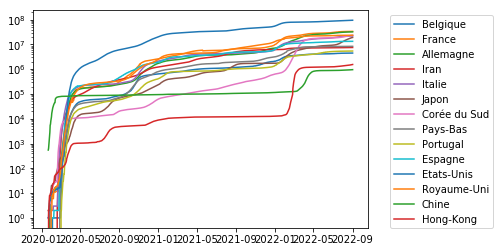

In [21]:
# On indique quelles series on montre dans le graphique
plt.plot(X_ax, Belgique[1:], label='Belgique')
plt.plot( X_ax, France[1:], label= 'France')
plt.plot( X_ax, Allemagne[1:], label= 'Allemagne')
plt.plot( X_ax, Iran[1:], label= 'Iran')
plt.plot( X_ax, Italy[1:], label= 'Italie')
plt.plot( X_ax, Japon[1:], label= 'Japon')
plt.plot( X_ax, Coree[1:], label= 'Corée du Sud')
plt.plot( X_ax, PaysBas[1:], label= 'Pays-Bas')
plt.plot( X_ax, Portugal[1:], label= 'Portugal')
plt.plot( X_ax, Espagne[1:], label= 'Espagne')
plt.plot( X_ax, EtatsUnis[1:], label= 'Etats-Unis')
plt.plot( X_ax, RoyaumeUni[1:], label= 'Royaume-Uni')
plt.plot( X_ax, Chine[1:], label= 'Chine')
plt.plot( X_ax, HongKongs[1:], label= 'Hong-Kong')

# Plot another line on the same chart/graph
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()